In [ ]:
Title : ((65075, 20), (260296, 20), (260296, 10), (65075, 10))
Body  : ((65075, 479), (260296, 479), (260296, 10), (65075, 10))

In [ ]:
!pip install bert-tensorflow
!pip install transformers
#!wget "https://s3.amazonaws.com/models.huggingface.co/bert/bert-base-uncased-vocab.txt"

     |████████████████████████████████| 71kB 3.6MB/s 
     |████████████████████████████████| 2.3MB 6.9MB/s 
     |████████████████████████████████| 901kB 29.6MB/s 
     |████████████████████████████████| 3.3MB 38.8MB/s 


In [ ]:
import sys
import re 
import gc
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
#import tensorflow_addons as tfa

from gensim.models import fasttext
from gensim.models import FastText
from gensim.models import KeyedVectors

from nltk.corpus import stopwords
from gensim.models import FastText
from nltk import word_tokenize, stem
from bs4 import BeautifulSoup as bsp
from nltk.tokenize import ToktokTokenizer
from tokenizers import BertWordPieceTokenizer
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model, Sequential
from sklearn  .preprocessing import MultiLabelBinarizer
from tensorflow.keras.preprocessing import  sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from transformers import BertTokenizer, TFBertModel, BertTokenizerFast, BertConfig

from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding, GRU, Flatten, BatchNormalization, Conv1D, MaxPooling1D, concatenate

gc.collect()

30

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
!unzip gdrive/My\ Drive/DL/StacData/stacksample.zip

Archive:  gdrive/My Drive/DL/StacData/stacksample.zip
  inflating: Questions.csv           n

  inflating: Tags.csv                


In [ ]:
'''
cols_to_fetch = ['Id','Score','Title', 'Body']
quest = pd.read_csv('/content/Questions.csv', encoding='ISO-8859-1', usecols = cols_to_fetch)
#quest.head(5)
'''

"\ncols_to_fetch = ['Id','Score','Title', 'Body']\nquest = pd.read_csv('/content/Questions.csv', encoding='ISO-8859-1', usecols = cols_to_fetch)\n#quest.head(5)\n"

In [ ]:
def clean_html_tags(text):
    regex = re.compile('<.*?>')
    return re.sub(regex, '', text)

In [ ]:
def  clean_text(text):
    text = text.lower()
    text = bsp(text).get_text()
    re.sub("i'm" , "i am", text)
    re.sub("i've ", 'i have' , text)
    re.sub("needn't", "need not",              text)
    text = re.sub("needn't've", "need not have",      text)  
    text = re.sub("o'clock", "of the clock",          text)
    text = re.sub("oughtn't", "ought not",            text)
    text = re.sub("oughtn't've", "ought not have",    text)
    text = re.sub("shan't", "shall not",              text)
    text = re.sub("sha'n't", "shall not",             text)
    text = re.sub("shan't've", "shall not have",      text)
    text = re.sub("she'd've", "she would have",       text)
    text = re.sub("should've", "should have",         text)
    text = re.sub("shouldn't", "should not",          text)
    text = re.sub("shouldn't've", "should not have",  text)
    text = re.sub("so've", "so have",                 text)
    text = re.sub("that'd've", "that would have",     text)
    text = re.sub("they're", "they are",              text)
    text = re.sub("they've", "they have",             text)
    text = re.sub("to've", "to have",                 text)
    text = re.sub("wasn't", "was not",                text)
    text = re.sub("we'd've", "we would have",         text)
    text = re.sub("we'll", "we will",                 text)
    text = re.sub("we'll've", "we will have",         text)
    text = re.sub("we're", "we are",                  text)
    text = re.sub("we've", "we have",                 text)
    text = re.sub("weren't", "were not",              text)
    text = re.sub("what'll", "what will",             text)
    text = re.sub("what'll've", "what will have",     text)
    text = re.sub("what're", "what are",              text)
    text = re.sub("what's", "what is",                text)
    text = re.sub("what've", "what have",             text)
    text = re.sub("when've", "when have",             text)
    text = re.sub("where'd", "where did",             text)
    text = re.sub("where've", "where have",           text)
    text = re.sub("who'll", "who will",               text)
    text = re.sub("who'll've", "who will have",       text)
    text = re.sub("who's", "who is",                  text)
    text = re.sub("who've", "who have",               text)
    text = re.sub("why've", "why have",               text)
    text = re.sub("will've", "will have",             text)
    text = re.sub("won't", "will not",                text)
    text = re.sub("won't've", "will not have",        text)
    text = re.sub("would've", "would have",           text)
    text = re.sub("wouldn't", "would not",            text)
    text = re.sub("wouldn't've", "would not have",    text)
    text = re.sub("y'all", "you all",                 text)
    text = re.sub("y'all'd", "you all would",         text)
    text = re.sub("y'all'd've", "you all would have", text)
    text = re.sub("y'all're", "you all are",          text)
    text = re.sub("y'all've", "you all have",         text)
    text = re.sub("you'd've", "you would have",       text)
    text = re.sub("you're", "you are",                text)
    text = re.sub("you've", "you have",               text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub(r"\'\n", " ", text)
    text = re.sub(r"\'\xa0", " ", text)
    text = re.sub('\s+', ' ', text)
    text = re.sub( check_works, ' ' , str(text).strip() )
    text = text.strip(' ')

    return text

In [ ]:
'''
cols_to_fetch = ['Id', 'Score', 'Title', 'Body']
processed_quests = pd.read_csv('/content/Questions.csv', encoding='ISO-8859-1', usecols = cols_to_fetch, nrows=1)
processed_quests['Body_pp'] = np.nan

nltk.download('stopwords')
stop_words = stopwords.words('english')
check_works = '\\b|\s'.join(stop_words)

for quests in pd.read_csv('/content/Questions.csv', encoding='ISO-8859-1', usecols = cols_to_fetch, chunksize=450000): 
  quests['Body']  = quests['Body'].astype(str)
  quests['Title'] = quests['Title'].astype(str)
  quests['Body']  = quests['Title'] + quests['Body']
  quests['Body_pp'] = quests['Body'].apply(clean_text)
  processed_quests = pd.concat([processed_quests, quests], axis=0)
  print(processed_quests.shape)

processed_quests = processed_quests[1:]
print('---Pre Proecessed---')
print(processed_quests.shape)

#processed_data['Body_pp'] = processed_data['Body_pp'].apply(lambda x: re.sub(check_works, '' , str(x)).strip() )

processed_quests.drop(['Title', 'Body'], axis=1, inplace=True)
##Save processed data
processed_quests.to_csv('gdrive/My Drive/DL/StacData/processed_quests_data.csv.gz',  index=False ,compression='gzip')
'''

"\ncols_to_fetch = ['Id', 'Score', 'Title', 'Body']\nprocessed_quests = pd.read_csv('/content/Questions.csv', encoding='ISO-8859-1', usecols = cols_to_fetch, nrows=1)\nprocessed_quests['Body_pp'] = np.nan\n\nnltk.download('stopwords')\nstop_words = stopwords.words('english')\ncheck_works = '\\b|\\s'.join(stop_words)\n\nfor quests in pd.read_csv('/content/Questions.csv', encoding='ISO-8859-1', usecols = cols_to_fetch, chunksize=450000): \n  quests['Body']  = quests['Body'].astype(str)\n  quests['Title'] = quests['Title'].astype(str)\n  quests['Body']  = quests['Title'] + quests['Body']\n  quests['Body_pp'] = quests['Body'].apply(clean_text)\n  processed_quests = pd.concat([processed_quests, quests], axis=0)\n  print(processed_quests.shape)\n\nprocessed_quests = processed_quests[1:]\nprint('---Pre Proecessed---')\nprint(processed_quests.shape)\n\n#processed_data['Body_pp'] = processed_data['Body_pp'].apply(lambda x: re.sub(check_works, '' , str(x)).strip() )\n\nprocessed_quests.drop(['Ti

In [ ]:
cols_to_fetch = ['Id', 'Score', 'Title', 'Body']
processed_quests = pd.read_csv('/content/Questions.csv', encoding='ISO-8859-1', usecols = cols_to_fetch, nrows=1)
processed_quests['Body_pp'] = np.nan

nltk.download('stopwords')
stop_words = stopwords.words('english')
check_works = '\\b|\s'.join(stop_words) 

for quests in pd.read_csv('/content/Questions.csv', encoding='ISO-8859-1', usecols = cols_to_fetch, chunksize=450000): 
  quests['Body']  = quests['Body'].astype(str)
  quests['Title'] = quests['Title'].astype(str)
  
  quests['Body_pp']  = quests['Body'].apply(clean_text)
  #quests['Title_pp'] = quests['Title']
  quests['Title_pp'] = quests['Title'].apply(clean_text)

  processed_quests = pd.concat([processed_quests, quests], axis=0)
  print(processed_quests.shape)

processed_quests = processed_quests[1:]
print('---Pre Proecessed---')
print(processed_quests.shape)

#processed_data['Body_pp'] = processed_data['Body_pp'].apply(lambda x: re.sub(check_works, '' , str(x)).strip() )

processed_quests.drop(['Title', 'Body'], axis=1, inplace=True)
##Save processed data
processed_quests.to_csv('gdrive/My Drive/DL/StacData/processed_quests_23May_data.csv.gz',  index=False ,compression='gzip')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
(450001, 6)
(900001, 6)
(1264217, 6)
---Pre Proecessed---
(1264216, 6)


In [ ]:
del processed_quests
gc.collect()

499

In [ ]:
quests_pp = pd.read_csv('gdrive/My Drive/DL/StacData/processed_quests_23May_data.csv.gz' , encoding='ISO-8859-1',compression='gzip')
quests_pp = quests_pp.reset_index(drop=True)
quests_pp = quests_pp.head(400000)
#quests_pp = quests_pp[quests_pp['Score']>0]
print('Shape of quests_pp : {0}'.format(quests_pp.shape))
quests_pp.head(5)

Shape of quests_pp : (400000, 4)


,Id,Score,Body_pp,Title_pp
0,80,26,I've written a database generation script in S...,SQLStatement.execute() - multiple queries in o...
1,90,144,Are there any really good tutorials explaining...,Good branching and merging tutorials for Torto...
2,120,21,Has anyone got experience creating SQL-based A...,ASP.NET Site Maps
3,180,53,This is something I've pseudo-solved many time...,Function for creating color wheels
4,260,49,I have a little game written in C#. It uses a ...,Adding scripting functionality to .NET applica...


In [ ]:
tags_to_consider =10

tags = pd.read_csv('/content/Tags.csv', encoding="ISO-8859-1", dtype={'Tag': str} )
tags['Tag']      = tags['Tag'].astype(str)
most_common_tags = tags['Tag'].value_counts()[:tags_to_consider].index
tags         = tags[tags['Tag'].isin(most_common_tags)]

tags_grouped = tags.groupby('Id')['Tag'].apply( ','.join )
grouped_tags = pd.DataFrame({'Id' : tags_grouped.index, 'Tags' : tags_grouped.values}).reset_index(drop=True)

grouped_tags['Tags']  = grouped_tags['Tags'].apply(lambda x : x.split(',')  )

print('\nShape of grouped tags : {0}'.format(grouped_tags.shape))

##Merging if cleaned tag and question data
processed_data = pd.merge(quests_pp, grouped_tags, on='Id')
#processed_data = processed_data[:1000]
print('\nShape of processed_data : {0}'.format(processed_data.shape))
processed_data.head()


Shape of grouped tags : (706336, 2)

Shape of processed_data : (210324, 5)


,Id,Score,Body_pp,Title_pp,Tags
0,260,49,I have a little game written in C#. It uses a ...,Adding scripting functionality to .NET applica...,[c#]
1,330,29,I am working on a collection of classes used f...,Should I use nested classes in this case?,[c++]
2,650,79,I would like the version property of my applic...,Automatically update version number,[c#]
3,930,28,What's the simplest way to connect and query a...,How do I connect to a database and loop over a...,[c#]
4,1010,14,I need to grab the base64-encoded representati...,"How to get the value of built, encoded ViewState?",[c#]


In [ ]:
del grouped_tags
del quests_pp
del tags

gc.collect()

65

In [ ]:
'''
toktok = ToktokTokenizer()

#Removing punctuation
punct = '!"$%&\'()*,/:;<=>?@[\\]^_`{|}-~.-'
for punc in punct:
  processed_data['Body_pp'] = processed_data['Body_pp'].str.replace(punc, ' ')

extra_padding = 0
len_of_token     = processed_data['Body_pp'].apply(toktok.tokenize).str.len()
length_to_padded = int(np.quantile(len_of_token, 0.95) + extra_padding)
max_length       = len_of_token.max()
print('\n\t95% Quantile value {0}\n\tLength to be Padded {1}\n\tMax Length is {2}'.format(length_to_padded-extra_padding , length_to_padded , max_length ))
'''

'\ntoktok = ToktokTokenizer()\n\n#Removing punctuation\npunct = \'!"$%&\'()*,/:;<=>?@[\\]^_`{|}-~.-\'\nfor punc in punct:\n  processed_data[\'Body_pp\'] = processed_data[\'Body_pp\'].str.replace(punc, \' \')\n\nextra_padding = 0\nlen_of_token     = processed_data[\'Body_pp\'].apply(toktok.tokenize).str.len()\nlength_to_padded = int(np.quantile(len_of_token, 0.95) + extra_padding)\nmax_length       = len_of_token.max()\nprint(\'\n\t95% Quantile value {0}\n\tLength to be Padded {1}\n\tMax Length is {2}\'.format(length_to_padded-extra_padding , length_to_padded , max_length ))\n'

In [ ]:
toktok = ToktokTokenizer()

#Removing punctuation
punct = '!"$%&\'()*,/:;<=>?@[\\]^_`{|}-~.-'
for punc in punct:
    processed_data['Body_pp'] = processed_data['Body_pp'].str.replace(punc, ' ')
    processed_data['Title_pp'] = processed_data['Title_pp'].str.replace(punc, ' ')

processed_data['Body_pp'] = processed_data['Body_pp'].str.replace('\d+', ' ')
processed_data['Title_pp'] = processed_data['Title_pp'].str.replace('\d+', ' ')

print('\nShape of processed_data : {0}'.format(processed_data.shape))
processed_data.head()

print('\nBody Data Details : ')
extra_padding_b = 0
len_of_token_b     = processed_data['Body_pp'].apply(toktok.tokenize).str.len()
length_to_padded_b = int(np.quantile(len_of_token_b, 0.95) + extra_padding_b)
max_length_b       = len_of_token_b.max()
print('97% Quantile value {0}\nLength to be Padded {1}\nMax Length is {2}'.format(length_to_padded_b-extra_padding_b , length_to_padded_b , max_length_b ))

print('\nTitle Data Details : ')
extra_padding_t = 2
len_of_token_t     = processed_data['Title_pp'].apply(toktok.tokenize).str.len()
length_to_padded_t = int(np.quantile(len_of_token_t, 0.95) + extra_padding_t)
max_length_t       = len_of_token_t.max()
print('95% Quantile value {0}\nLength to be Padded {1}\nMax Length is {2}'.format(length_to_padded_t-extra_padding_t , length_to_padded_t , max_length_t ))


Shape of processed_data : (210324, 5)

Body Data Details : 
97% Quantile value 622
Length to be Padded 622
Max Length is 12912

Title Data Details : 
95% Quantile value 17
Length to be Padded 19
Max Length is 49


In [ ]:
#processed_data = processed_data[processed_data['Score'] > 3]
processed_data.dropna(inplace =True)
#processed_data[processed_data['Body_pp'].isna()]
'''
tagBinarizer = MultiLabelBinarizer()

allTags = list(tagBinarizer.classes_)

train_d , test_d = train_test_split(processed_data, test_size=0.20)
x_train = train_d['Body_pp']
y_train  = train_d['Tags']

x_test = test_d['Body_pp']
y_test = test_d['Tags']

tagBinarizer.fit(processed_data['Tags'])
y_train = tagBinarizer.transform(train_d['Tags'])
y_test  = tagBinarizer.transform(test_d['Tags'])
'''
'''
x_train, x_test, y_train, y_test = train_test_split(processed_data['Body_pp'], Tags_bin, test_size=0.25)
print(x_train.shape , y_train.shape, x_test.shape, y_test.shape)
'''
processed_data.shape

In [ ]:
#processed_data = processed_data[processed_data['Score'] > 3]
processed_data = processed_data.loc[processed_data.astype(str).drop_duplicates().index]
processed_data.dropna(inplace =True)
#processed_data[processed_data['Body_pp'].isna()]

tagBinarizer = MultiLabelBinarizer()

train_d , test_d = train_test_split(processed_data, test_size=0.20)
x_train_b = train_d['Body_pp']
x_train_t = train_d['Title_pp']

x_test_b = test_d['Body_pp']
x_test_t = test_d['Title_pp']

tagBinarizer.fit(processed_data['Tags'])
y_train = tagBinarizer.transform(train_d['Tags'])
y_test  = tagBinarizer.transform(test_d['Tags'])

allTags = list(tagBinarizer.classes_)
print(allTags)

del processed_data
gc.collect()

['android', 'c#', 'c++', 'html', 'ios', 'java', 'javascript', 'jquery', 'php', 'python']


13

In [ ]:
'''
bertTokenizeFast = BertTokenizerFast.from_pretrained('bert-base-uncased')

special_tokens_dict = {'additional_special_tokens': allTags}
num_added_toks = bertTokenizeFast.add_special_tokens(special_tokens_dict)

tokenizeFast_train = bertTokenizeFast.batch_encode_plus(x_train.to_list() , return_attention_mask=False, add_special_tokens=False, truncation=True,padding=True, max_length=length_to_padded )
token_ids_train = np.array([tokenizeFast_train[i].ids for i in range(len(tokenizeFast_train[0:])) ])

del tokenizeFast_train
gc.collect()

tokenizeFast_test  = bertTokenizeFast.batch_encode_plus(x_test.to_list() , return_attention_mask=False, add_special_tokens=False, truncation=True,padding=True, max_length=length_to_padded )
token_ids_test = np.array([tokenizeFast_test[i].ids for i in range(len(tokenizeFast_test[0:])) ])

del tokenizeFast_test
gc.collect()

vocab_len = bertTokenizeFast.vocab_size
print('Vocab Length : {0}'.format(vocab_len))
'''

"\nbertTokenizeFast = BertTokenizerFast.from_pretrained('bert-base-uncased')\n\nspecial_tokens_dict = {'additional_special_tokens': allTags}\nnum_added_toks = bertTokenizeFast.add_special_tokens(special_tokens_dict)\n\ntokenizeFast_train = bertTokenizeFast.batch_encode_plus(x_train.to_list() , return_attention_mask=False, add_special_tokens=False, truncation=True,padding=True, max_length=length_to_padded )\ntoken_ids_train = np.array([tokenizeFast_train[i].ids for i in range(len(tokenizeFast_train[0:])) ])\n\ndel tokenizeFast_train\ngc.collect()\n\ntokenizeFast_test  = bertTokenizeFast.batch_encode_plus(x_test.to_list() , return_attention_mask=False, add_special_tokens=False, truncation=True,padding=True, max_length=length_to_padded )\ntoken_ids_test = np.array([tokenizeFast_test[i].ids for i in range(len(tokenizeFast_test[0:])) ])\n\ndel tokenizeFast_test\ngc.collect()\n\nvocab_len = bertTokenizeFast.vocab_size\nprint('Vocab Length : {0}'.format(vocab_len))\n"

In [ ]:
from gensim.models import fasttext
from gensim.models import FastText
from gensim.models import KeyedVectors

en_model = KeyedVectors.load_word2vec_format('D:\\Rishabh\\Python\\Embeddings\\wiki.en.vec')

embedding_dim = 300
num_tokens    = vocab_len+5
embedding_matrix = np.zeros((num_tokens, embedding_dim))
words_not_found = []
word, i, not_in_fasttext, word_found = None,0, 0, 0

for word in bertTokenizeFast.vocab.keys():
    try:
        embedding_matrix[i] = en_model.get_vector(word)
        word_found+=1
    except:
        words_not_found.append(word)
        not_in_fasttext+=1
        
    i=i+1
        
print("Word Found {0} and not found {1}".format(word_found, not_in_fasttext) )

In [ ]:
'''
bertTokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

special_tokens_dict = {'additional_special_tokens': allTags}
num_added_toks = bertTokenizer.add_special_tokens(special_tokens_dict)

bertModel = TFBertModel.from_pretrained('bert-base-uncased')
bertModel.resize_token_embeddings(len(bertTokenizer))

tokenizedData = processed_data['Body_pp'].apply( lambda x:  bertTokenizer.encode(x, add_special_tokens =True, max_length=100, padding=True, is_split_into_words=True) )
'''

"\nbertTokenizer = BertTokenizer.from_pretrained('bert-base-uncased')\n\nspecial_tokens_dict = {'additional_special_tokens': allTags}\nnum_added_toks = bertTokenizer.add_special_tokens(special_tokens_dict)\n\nbertModel = TFBertModel.from_pretrained('bert-base-uncased')\nbertModel.resize_token_embeddings(len(bertTokenizer))\n\ntokenizedData = processed_data['Body_pp'].apply( lambda x:  bertTokenizer.encode(x, add_special_tokens =True, max_length=100, padding=True, is_split_into_words=True) )\n"

In [ ]:
'''
bertBaseUncased = "bert-base-uncased-vocab.txt"
bertWPT = BertWordPieceTokenizer(bertBaseUncased)
special_tokens_dict = {'additional_special_tokens': allTags}
num_added_toks = bertWPT.add_special_tokens(special_tokens_dict['additional_special_tokens'])

bertModel = TFBertModel.from_pretrained('bert-base-uncased')
bertModel.resize_token_embeddings(bertWPT.get_vocab_size())

tokenizedData = bertWPT.encode_batch(processed_data['Body_pp'] , add_special_tokens=True)
'''

'\nbertBaseUncased = "bert-base-uncased-vocab.txt"\nbertWPT = BertWordPieceTokenizer(bertBaseUncased)\nspecial_tokens_dict = {\'additional_special_tokens\': allTags}\nnum_added_toks = bertWPT.add_special_tokens(special_tokens_dict[\'additional_special_tokens\'])\n\nbertModel = TFBertModel.from_pretrained(\'bert-base-uncased\')\nbertModel.resize_token_embeddings(bertWPT.get_vocab_size())\n\ntokenizedData = bertWPT.encode_batch(processed_data[\'Body_pp\'] , add_special_tokens=True)\n'

In [ ]:
'''
bertTokenizeFast = BertTokenizerFast.from_pretrained('bert-base-uncased')

special_tokens_dict = {'additional_special_tokens': allTags}
num_added_toks = bertTokenizeFast.add_special_tokens(special_tokens_dict)

config = BertConfig.from_pretrained('bert-base-uncased', output_hidden_states=True, output_attentions=False, num_labels=10)
bertModel = TFBertModel.from_pretrained('bert-base-uncased', config=config)
bertModel.resize_token_embeddings(len(bertTokenizeFast))
bertModel.trainable=False

print('\nTokenizer Model Size : {0}\n'.format(len(bertTokenizeFast)))

tokenizeFast_train = bertTokenizeFast.batch_encode_plus(x_train.to_list() , add_special_tokens=True, truncation=True,padding=True, max_length=length_to_padded )
tokenizeFast_test  = bertTokenizeFast.batch_encode_plus(x_test.to_list() , add_special_tokens=True, truncation=True,padding=True, max_length=length_to_padded )

bertModel.summary()

tokenizeFast_train = bertTokenizeFast.batch_encode_plus(processed_data['Body_pp'].to_list() , add_special_tokens=True, truncation=True,padding=True, max_length=length_to_padded )
tokenizeFast_test  = bertTokenizeFast.batch_encode_plus(processed_data['Body_pp'].to_list() , add_special_tokens=True, truncation=True,padding=True, max_length=length_to_padded )
'''

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.



Tokenizer Model Size : 30526

Model: "tf_bert_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bert (TFBertMainLayer)       multiple                  109485312 
Total params: 109,485,312
Trainable params: 0
Non-trainable params: 109,485,312
_________________________________________________________________


"\ntokenizeFast_train = bertTokenizeFast.batch_encode_plus(processed_data['Body_pp'].to_list() , add_special_tokens=True, truncation=True,padding=True, max_length=length_to_padded )\ntokenizeFast_test  = bertTokenizeFast.batch_encode_plus(processed_data['Body_pp'].to_list() , add_special_tokens=True, truncation=True,padding=True, max_length=length_to_padded )\n"

In [ ]:
'''
def return_id_mask(i):
  return (list(tokenizeFast[i].ids), list(tokenizeFast[i].attention_mask))

token_ids, token_mask = zip(*[ return_id_mask(i) for i in range(len(tokenizeFast[0:])) ])
'''

'\ndef return_id_mask(i):\n  return (list(tokenizeFast[i].ids), list(tokenizeFast[i].attention_mask))\n\ntoken_ids, token_mask = zip(*[ return_id_mask(i) for i in range(len(tokenizeFast[0:])) ])\n'

In [ ]:
'''
token_ids_train = np.array([tokenizeFast_train[i].ids for i in range(len(tokenizeFast_train[0:])) ])
token_mask_train = np.array([tokenizeFast_train[i].attention_mask for i in range(len(tokenizeFast_train[0:])) ])

token_ids_test = np.array([tokenizeFast_test[i].ids for i in range(len(tokenizeFast_test[0:])) ])
token_mask_test = np.array([tokenizeFast_test[i].attention_mask for i in range(len(tokenizeFast_test[0:])) ])

## FREE SOME MEMORY
sys.getrefcount(tokenizeFast_train)
sys.getrefcount(tokenizeFast_test)

del tokenizeFast_train
del tokenizeFast_test

gc.collect() 

## saving tokens and mask from drive

np.save('gdrive/My Drive/DL/StacData/token_ids_train' , token_ids_train)
np.save('gdrive/My Drive/DL/StacData/token_mask_train', token_mask_train)

np.save('gdrive/My Drive/DL/StacData/token_ids_test' , token_ids_test)
np.save('gdrive/My Drive/DL/StacData/token_mask_test', token_mask_test)
'''

In [ ]:
'''
## Loading tokens and mask from drive
#!pip install bert-tensorflow
#!pip install transformers

#import numpy as np
#from google.colab import drive
#drive.mount('/content/gdrive/')

token_ids_train  = np.load('gdrive/My Drive/DL/StacData/token_ids_train.npy')
token_mask_train = np.load('gdrive/My Drive/DL/StacData/token_mask_train.npy')

token_ids_test = np.load('gdrive/My Drive/DL/StacData/token_ids_test.npy')
token_mask_test = np.load('gdrive/My Drive/DL/StacData/token_mask_test.npy')

#from transformers import BertTokenizer, TFBertModel, BertTokenizerFast
#bertModel = TFBertModel.from_pretrained('bert-base-uncased')
#bertModel.resize_token_embeddings(30644)
'''

In [ ]:
'''
config = BertConfig.from_pretrained('bert-base-uncased', output_hidden_states=True, output_attentions=False, num_labels=10, use_cache=False)
bertModel = TFBertModel.from_pretrained('bert-base-uncased', config=config)
bertModel.resize_token_embeddings(len(bertTokenizeFast))
bertModel.trainable=False
'''

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
bertModel.config

BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4",
    "5": "LABEL_5",
    "6": "LABEL_6",
    "7": "LABEL_7",
    "8": "LABEL_8",
    "9": "LABEL_9"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2,
    "LABEL_3": 3,
    "LABEL_4": 4,
    "LABEL_5": 5,
    "LABEL_6": 6,
    "LABEL_7": 7,
    "LABEL_8": 8,
    "LABEL_9": 9
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "output_hidden_states": true,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.6.0",
 

In [ ]:
def BERT_LSTM(bertModelEnc, max_len=length_to_padded):
   input_ids  = Input(name='inp_layer_id', shape=(max_len,), dtype='int32' )
   input_mask = Input(name='inp_layer_mask', shape=(max_len,), dtype='int32' )

   embed     = bertModelEnc(input_ids, attention_mask=input_mask)[0]
   #embed     = bertModelEnc(input_ids, attention_mask=input_mask).last_hidden_state
   #cls_token = embed[:, 0, :]

   #layer     = LSTM(100, recurrent_dropout=0.2, dropout=0.2)(embed)
   layer     = LSTM(100)(embed)
   layer     = Dense(256, name='hidden_1', activation='relu')(layer)
   layer     = Dropout(0.3)(layer)
   #layer     = BatchNormalization()(layer)
   #layer     = Dense(150, name='hidden_2', activation='relu')(layer)
   layer     = Dense(10, name='output_layer', activation='sigmoid')(layer)

   model     = Model(inputs=[input_ids, input_mask] , outputs=layer)
   
   return model

In [ ]:
#@tf.autograph.experimental.do_not_convert
bert_lstm_model = BERT_LSTM(bertModel)
bert_lstm_model.compile(loss=['categorical_crossentropy'],optimizer='adam', metrics=['binary_accuracy'])

'''
bert_lstm_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])
'''            
bert_lstm_model.summary()

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experi

In [ ]:
bert_inp_train = {
    'inp_layer_id' : token_ids_train,
    'inp_layer_mask' : token_mask_train
}

bert_inp_test = {
    'inp_layer_id' : token_ids_test,
    'inp_layer_mask' : token_mask_test
}

bert_output_train = {
    'output_layer' : y_train
}

bert_output_test = {
    'output_layer' : y_test
}

bert_lstm_model.fit(bert_inp_train , bert_output_train, batch_size=50,
                    epochs=3, validation_data=(bert_inp_test, bert_output_test) )

Epoch 1/3
 372/1110 [=========>....................] - ETA: 15:19:29 - loss: 2.3854 - binary_accuracy: 0.2303

### Multi Channel CNN

In [ ]:
'''
token_ids_train  = np.load('C:\\Users\\Admin\\Desktop\\Python\\DeepLearning\\Stack_overflow_tag_predictor\\token_ids_train.npy')

token_ids_test   = np.load('C:\\Users\\Admin\\Desktop\\Python\\DeepLearning\\Stack_overflow_tag_predictor\\token_ids_test.npy')

embedding_matrix = np.load('C:\\Users\\Admin\\Desktop\\Python\\DeepLearning\\Stack_overflow_tag_predictor\\embedding_matrix.npy')

y_train = np.load('C:\\Users\\Admin\\Desktop\\Python\\DeepLearning\\Stack_overflow_tag_predictor\\y_train.npy')
y_test  = np.load('C:\\Users\\Admin\\Desktop\\Python\\DeepLearning\\Stack_overflow_tag_predictor\\y_test.npy')
'''

"\ntoken_ids_train  = np.load('C:\\Users\\Admin\\Desktop\\Python\\DeepLearning\\Stack_overflow_tag_predictor\\token_ids_train.npy')\n\ntoken_ids_test   = np.load('C:\\Users\\Admin\\Desktop\\Python\\DeepLearning\\Stack_overflow_tag_predictor\\token_ids_test.npy')\n\nembedding_matrix = np.load('C:\\Users\\Admin\\Desktop\\Python\\DeepLearning\\Stack_overflow_tag_predictor\\embedding_matrix.npy')\n\ny_train = np.load('C:\\Users\\Admin\\Desktop\\Python\\DeepLearning\\Stack_overflow_tag_predictor\\y_train.npy')\ny_test  = np.load('C:\\Users\\Admin\\Desktop\\Python\\DeepLearning\\Stack_overflow_tag_predictor\\y_test.npy')\n"

### Implementing Keras Tokenizer

# Implement LSTM as final model rest of all are the trials which were perfromed

In [ ]:
tok_b = Tokenizer(char_level=False, split=' ' )
tok_b.fit_on_texts(x_train_b)

token_ids_train_b = tok_b.texts_to_sequences(x_train_b)
token_ids_train_b = sequence.pad_sequences(token_ids_train_b , maxlen=length_to_padded_b)

token_ids_test_b = tok_b.texts_to_sequences(x_test_b)
token_ids_test_b = sequence.pad_sequences(token_ids_test_b , maxlen=length_to_padded_b)

vocab_len_b = len(tok_b.index_word.keys())
print('Vocab Length of train Body: {0}'.format(vocab_len_b)) 

tok_t = Tokenizer(char_level=False,  split=' ')
tok_t.fit_on_texts(x_train_t)
token_ids_train_t = tok_t.texts_to_sequences(x_train_t)
token_ids_train_t = sequence.pad_sequences(token_ids_train_t , maxlen=length_to_padded_t)

token_ids_test_t = tok_t.texts_to_sequences(x_test_t)
token_ids_test_t = sequence.pad_sequences(token_ids_test_t , maxlen=length_to_padded_t)

vocab_len_t = len(tok_t.index_word.keys())
print('Vocab Length of train Title: {0}'.format(vocab_len_t)) 

Vocab Length of train Body: 531157
Vocab Length of train Title: 38285


Shapes Of Body and Title

In [ ]:
token_ids_test_b.shape, token_ids_train_b.shape, y_train.shape, y_test.shape

((53291, 651), (213161, 651), (213161, 10), (53291, 10))

In [ ]:
token_ids_test_t.shape, token_ids_train_t.shape, y_train.shape, y_test.shape

((53291, 19), (213161, 19), (213161, 10), (53291, 10))

In [ ]:
def CNN_Model(embedding_matrix_b, embedding_matrix_t, embed_dim_b, embed_dim_t, vocab_size_b, vocab_size_t, max_len_b, max_len_t):
    input_id_b = Input(name='inp_body_id', shape=[max_len_b])

    #embedd_layer_b = Embedding(input_dim=vocab_size_b , output_dim=2000, input_length=[max_len_b] , mask_zero=True, weights=[embedding_matrix_b], name='BodyEmbedding', trainable=True)(input_id_b)

    embedd_layer_b = Embedding(input_dim=vocab_size_b , output_dim=embed_dim_b, input_length=[max_len_b] , mask_zero=True, 
                               name='BodyEmbedding', trainable=True)(input_id_b)

    input_id_t = Input( name='inp_title_id', shape=[max_len_t] )

    embedd_layer_t = Embedding(input_dim=vocab_size_t , output_dim=embed_dim_t, input_length=[max_len_t] , mask_zero=True, 
                               name='TitleEmbedding', trainable=True)(input_id_t)
    
    ##Channel 1
    conv1   = Conv1D(filters=32, kernel_size=3, activation='relu', padding='same')(embedd_layer_b)
    #conv1 = BatchNormalization()(conv1)
    #drop1 = Dropout(0.3)(conv1)
    pool1 = MaxPooling1D()(conv1)
    #flat1 = Flatten()(pool1)
    
    ##Channel 2
    conv2 = Conv1D(filters=32, kernel_size=3, activation='relu', padding='same')(embedd_layer_t)
    #conv2 = BatchNormalization()(conv2)
    #drop2 = Dropout(0.3)(conv2)
    pool2 = MaxPooling1D()(conv2)
    #flat2 = Flatten()(pool2)

    merged_layer = concatenate([pool1, pool2], axis=1)
    
    conv3 = Conv1D(filters=32, kernel_size=3, activation='relu', padding='same')(merged_layer)
    conv3 = BatchNormalization()(conv3)
    pool3 = MaxPooling1D()(conv3)
    flat3 = Flatten()(pool3)
    
    dense1 = Dense(1000, name='hidden_layer_1',activation='relu')(flat3)
    dense1  = Dropout(0.3)(dense1)
    
    dense2 = Dense(250, name='hidden_layer_2',activation='relu')(dense1)
    btchLayer  = BatchNormalization()(dense2) 
    op_layer = Dense(10, name='output_layer',activation='sigmoid')(btchLayer)
    
    model     = Model(inputs=[input_id_b, input_id_t] , outputs=op_layer)
    return model

In [ ]:
model = CNN_Model(None, None, 300, 300, vocab_len_b+1, vocab_len_t+1, length_to_padded_b, length_to_padded_t)
#optimize = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'binary_accuracy'] )

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inp_body_id (InputLayer)        [(None, 571)]        0                                            
__________________________________________________________________________________________________
inp_title_id (InputLayer)       [(None, 25)]         0                                            
__________________________________________________________________________________________________
BodyEmbedding (Embedding)       (None, 571, 300)     158065800   inp_body_id[0][0]                
__________________________________________________________________________________________________
TitleEmbedding (Embedding)      (None, 25, 300)      11855100    inp_title_id[0][0]               
______________________________________________________________________________________________

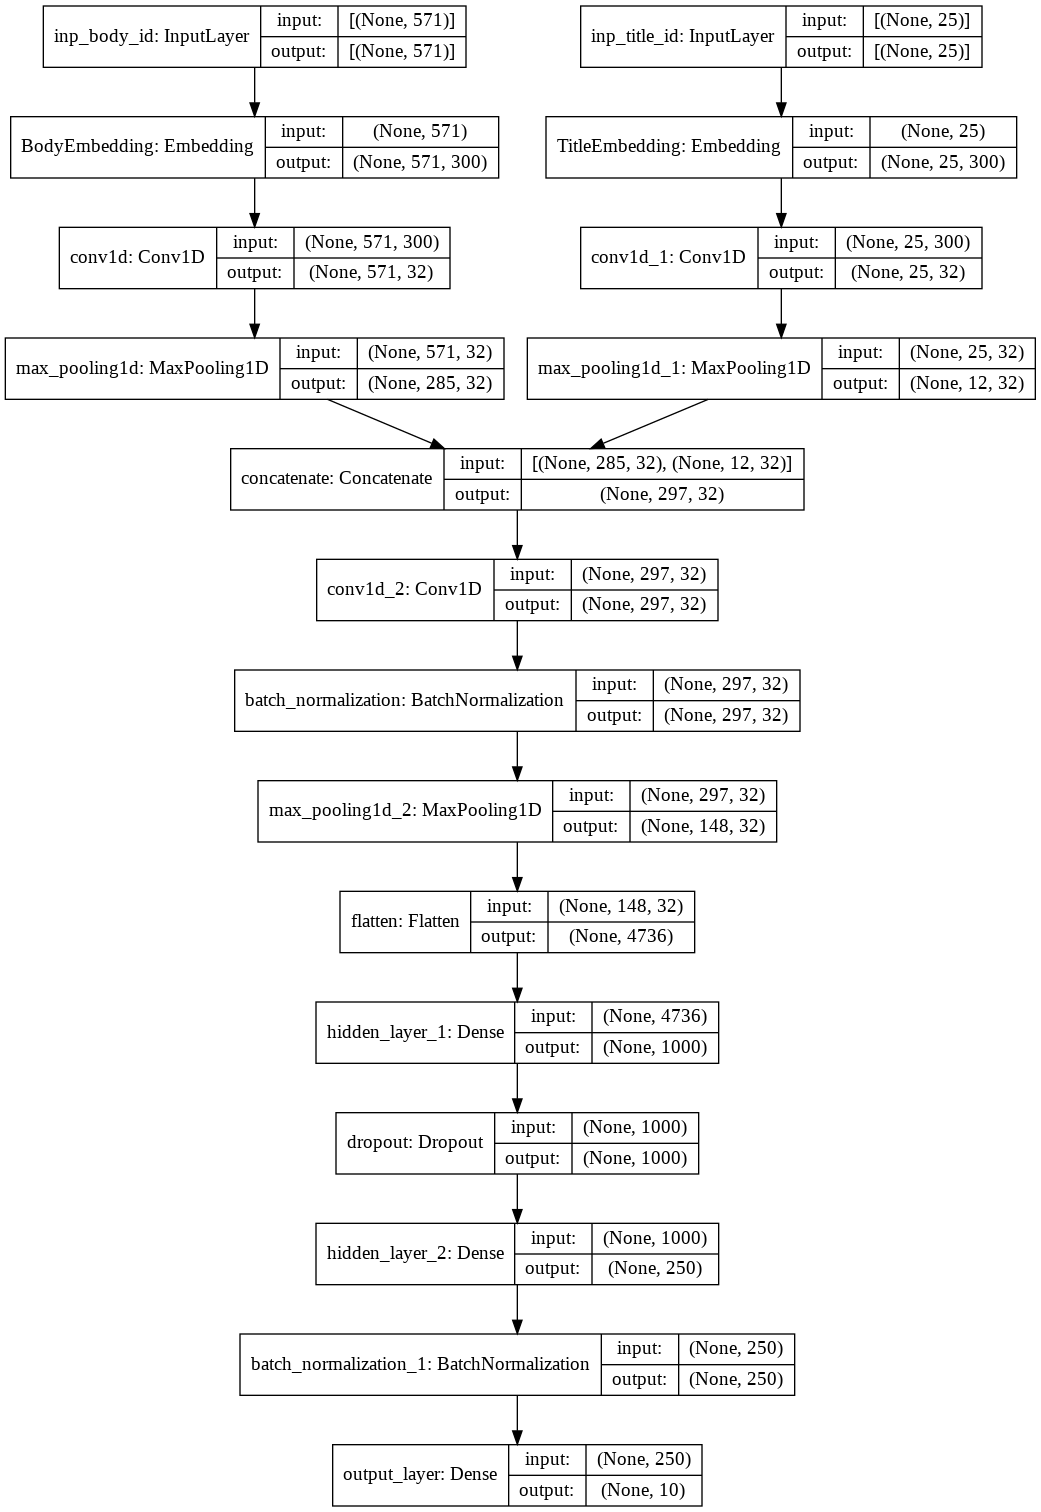

In [ ]:
plot_model(model, show_shapes=True, to_file='multichannel.png')

In [ ]:
#tqdm_callback = tfa.callbacks.TQDMProgressBar()
modelResults = model.fit( {'inp_body_id': token_ids_train_b , 'inp_title_id': token_ids_train_t}, 
                         y_train, 
                         #verbose=0, 
                         #callbacks=[tqdm_callback], 
                         batch_size=250, 
                         epochs=3, 
                         shuffle =True,
                         validation_split =0.2 )

Epoch 1/3
683/683 [==============================] - 2202s 3s/step - loss: 3.1741 - accuracy: 0.5286 - binary_accuracy: 0.6155 - val_loss: 6.4639 - val_accuracy: 0.4823 - val_binary_accuracy: 0.6900
Epoch 2/3
148/683 [=====>........................] - ETA: 28:25 - loss: 6.1417 - accuracy: 0.4391 - binary_accuracy: 0.4102

KeyboardInterrupt: ignored

In [ ]:
who

Activation	 BatchNormalization	 BertConfig	 BertTokenizer	 BertTokenizerFast	 BertWordPieceTokenizer	 Conv1D	 Dense	 Dropout	 
Embedding	 FastText	 Flatten	 GRU	 Input	 KeyedVectors	 LSTM	 MaxPooling1D	 Model	 
MultiLabelBinarizer	 RNN	 Sequential	 TFBertModel	 Tokenizer	 ToktokTokenizer	 allTags	 bsp	 concatenate	 
drive	 extra_padding_b	 extra_padding_t	 fasttext	 gc	 len_of_token_b	 len_of_token_t	 length_to_padded_b	 length_to_padded_t	 
max_length_b	 max_length_t	 model	 most_common_tags	 nltk	 np	 pd	 plot_model	 re	 
sequence	 sns	 stem	 stopwords	 sys	 tagBinarizer	 tags_grouped	 tags_to_consider	 test_d	 
tf	 tok_b	 tok_t	 token_ids_test_b	 token_ids_test_t	 token_ids_train_b	 token_ids_train_t	 toktok	 train_d	 
train_test_split	 vocab_len_b	 vocab_len_t	 word_tokenize	 x_test_b	 x_test_t	 x_train_b	 x_train_t	 y_test	 
y_train	 


In [ ]:
del tags_grouped
del stopwords
del fasttext
del TFBertModel
del BertTokenizerFast

gc.collect()

50

In [ ]:
def CNN_Model(embedding_matrix_b, embedding_matrix_t, embed_dim_b, embed_dim_t, vocab_size_b, vocab_size_t, max_len_b, max_len_t):
    input_id_b = Input(name='inp_body_id', shape=[max_len_b])


    #embedd_layer_b = Embedding(input_dim=vocab_size_b , output_dim=2000, input_length=[max_len_b] , mask_zero=True, weights=[embedding_matrix_b], name='BodyEmbedding', trainable=True)(input_id_b)

    embedd_layer_b = Embedding(input_dim=vocab_size_b , output_dim=300, input_length=[max_len_b] , mask_zero=True, 
                               name='BodyEmbedding', trainable=True)(input_id_b)

    input_id_t = Input(name='inp_title_id', shape=[max_len_t])

    embedd_layer_t = Embedding(input_dim=vocab_size_t , output_dim=1000, input_length=[max_len_t] , mask_zero=True, 
                               name='TitleEmbedding', trainable=True)(input_id_t)
    
    ##Channel 1
    conv1 = Conv1D(filters=16, kernel_size=3, activation='relu', padding='same')(embedd_layer_b)
    #drop1 = Dropout(0.3)(conv1)
    pool1 = MaxPooling1D()(conv1)
    #flat1 = Flatten()(pool1)
    
    ##Channel 2
    conv2 = Conv1D(filters=16, kernel_size=3, activation='relu', padding='same')(embedd_layer_t)
    #drop2 = Dropout(0.3)(conv2)
    pool2 = MaxPooling1D()(conv2)
    #flat2 = Flatten()(pool2)

    merged_layer = concatenate([pool1, pool2], axis=1)
    
    conv3 = Conv1D(filters=16, kernel_size=3, activation='relu', padding='same')(merged_layer)
    pool3 = MaxPooling1D()(conv3)
    flat3 = Flatten()(pool3)
    
    dense1 = Dense(1000, name='hidden_layer_1',activation='relu')(flat3)
    dense1  = Dropout(0.3)(dense1)
    
    btchLayer  = BatchNormalization()(dense1) 
    
    dense2 = Dense(100, name='hidden_layer_2',activation='relu')(btchLayer)

    op_layer = Dense(10, name='output_layer',activation='sigmoid')(dense2)
    
    model     = Model(inputs=[input_id_b, input_id_t] , outputs=op_layer)
    return model

In [ ]:
model = CNN_Model(None, 200, None, 200, 702648+1, 48881+1, 479, 20)
#optimize = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'binary_accuracy'] )

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inp_body_id (InputLayer)        [(None, 479)]        0                                            
__________________________________________________________________________________________________
inp_title_id (InputLayer)       [(None, 20)]         0                                            
__________________________________________________________________________________________________
BodyEmbedding (Embedding)       (None, 479, 300)     210794700   inp_body_id[0][0]                
__________________________________________________________________________________________________
TitleEmbedding (Embedding)      (None, 20, 1000)     48882000    inp_title_id[0][0]               
____________________________________________________________________________________________

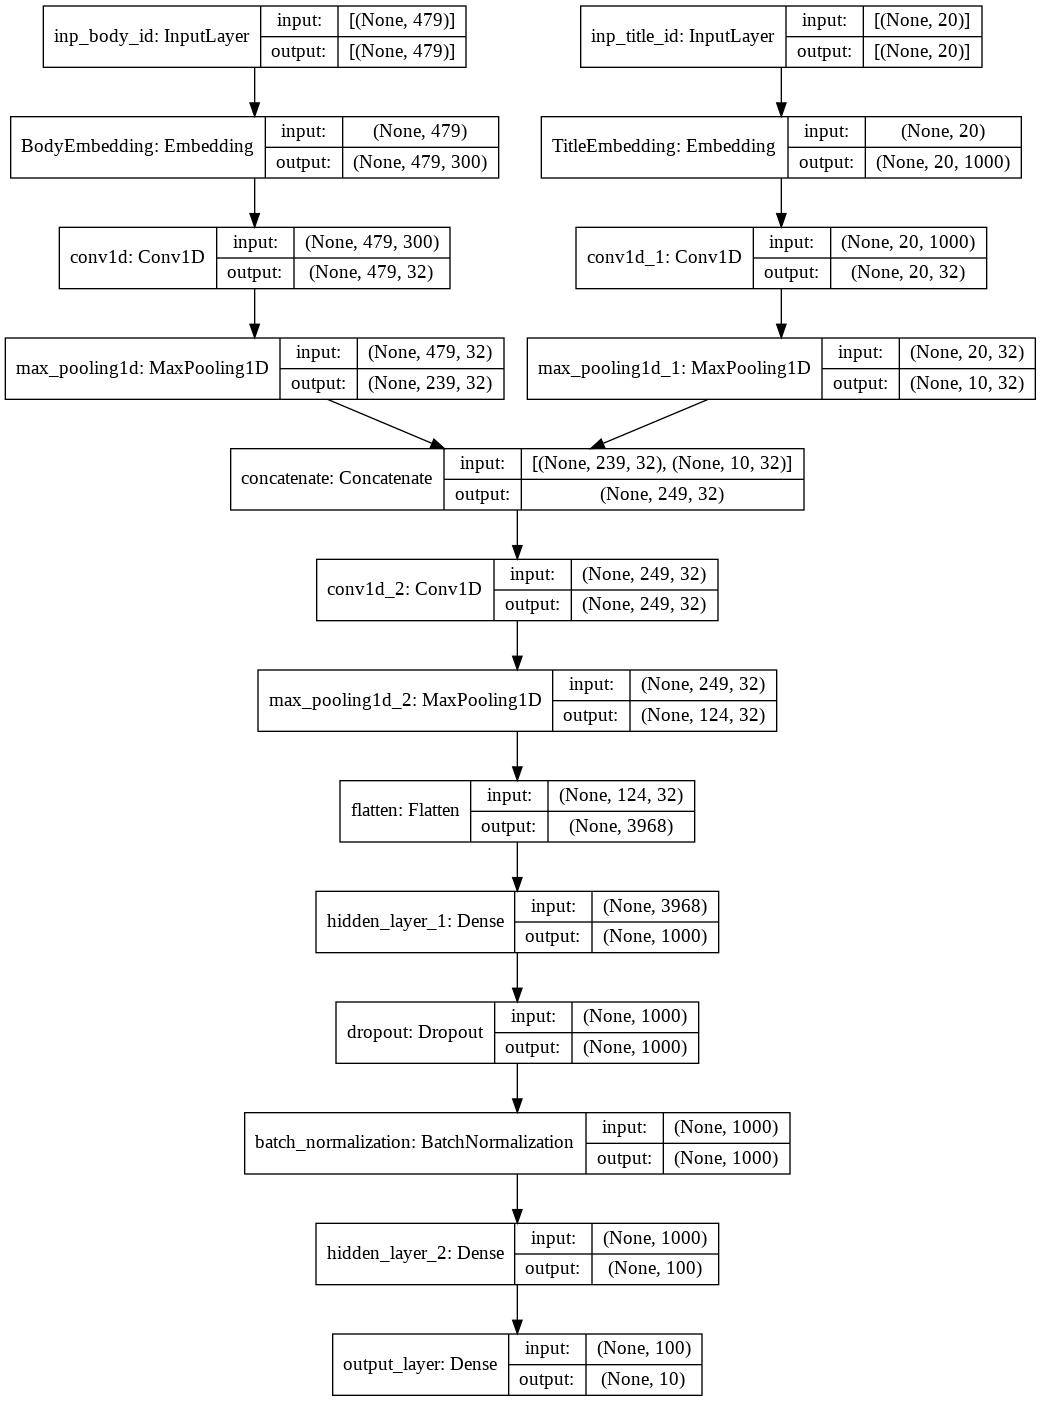

In [ ]:
plot_model(model, show_shapes=True, to_file='multichannel.png')

In [ ]:
##Not Implemented as results were nt good
token_ids_train_b  = np.load('/content/token_ids_train_b.npy')
token_ids_test_b   = np.load('/content/token_ids_test_b.npy')

token_ids_train_t  = np.load('/content/token_ids_train_t.npy')
token_ids_test_t   = np.load('/content/token_ids_test_t.npy')

y_train = np.load('/content/y_train.npy')
y_test  = np.load('/content/y_test.npy')

'''
Title : ((65075, 20), (260296, 20), (260296, 10), (65075, 10))
Body  : ((65075, 479), (260296, 479), (260296, 10), (65075, 10))
'''
#tqdm_callback = tfa.callbacks.TQDMProgressBar()

modelResults = model.fit( {'inp_body_id': token_ids_train_b , 'inp_title_id': token_ids_train_t}, 
                         y_train, 
                         #verbose=0, 
                         #callbacks=[tqdm_callback], 
                         batch_size=250, 
                         epochs=5, 
                         shuffle =True,
                         validation_split =0.3 )

'\nTitle : ((65075, 20), (260296, 20), (260296, 10), (65075, 10))\nBody  : ((65075, 479), (260296, 479), (260296, 10), (65075, 10))\n'

### Implmented LSTM Model

In [ ]:
def RNN_LSTM(embedding_matrix_b, embedding_matrix_t, embed_dim_b, embed_dim_t, vocab_size_b, vocab_size_t, max_len_b, max_len_t):
    input_id_b = Input(name='inp_body_id', shape=[max_len_b])

    embedd_layer_b = Embedding(input_dim=vocab_size_b , output_dim=300, input_length=[max_len_b] , mask_zero=True, 
                          name='BodyEmbedding', trainable=True)(input_id_b)

    input_id_t = Input(name='inp_title_id', shape=[max_len_t])

    embedd_layer_t = Embedding(input_dim=vocab_size_t , output_dim=1000, input_length=[max_len_t] , mask_zero=True, 
                          name='TitleEmbedding', trainable=True)(input_id_t)
    
    layer_2  = LSTM(150)(embedd_layer_b)

    layer_3  = LSTM(25)(embedd_layer_t)
    
    merged_layer = concatenate([layer_2, layer_3])
    
    layer_4  = Dense(100, name='FC1', activation='relu')(merged_layer)
    layer_4  = Dropout(0.3)(layer_4)
    #layer_4  = BatchNormalization()(layer_4)

    layer_5  = Dense(50 , name='FC2', activation='relu')(layer_4)
    layer_5  = Dropout(0.3)(layer_5) 
    layer_5  = BatchNormalization()(layer_5)

    layer_5  = Dense(10, name='output_layer', activation='sigmoid')(layer_5)
    
    model  = Model(inputs=[input_id_b, input_id_t] , outputs=layer_5)
    return model

model_1 = RNN_LSTM(None , None, None, None, vocab_len_b+2, vocab_len_t+2, length_to_padded_b, length_to_padded_t)
optimize = tf.keras.optimizers.Adam(learning_rate=0.01)
model_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'binary_accuracy'])

#plot_model(model_1, show_shapes=True)

model_1.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inp_body_id (InputLayer)        [(None, 622)]        0                                            
__________________________________________________________________________________________________
inp_title_id (InputLayer)       [(None, 19)]         0                                            
__________________________________________________________________________________________________
BodyEmbedding (Embedding)       (None, 622, 300)     159347700   inp_body_id[0][0]                
__________________________________________________________________________________________________
TitleEmbedding (Embedding)      (None, 19, 1000)     38287000    inp_title_id[0][0]               
______________________________________________________________________________________________

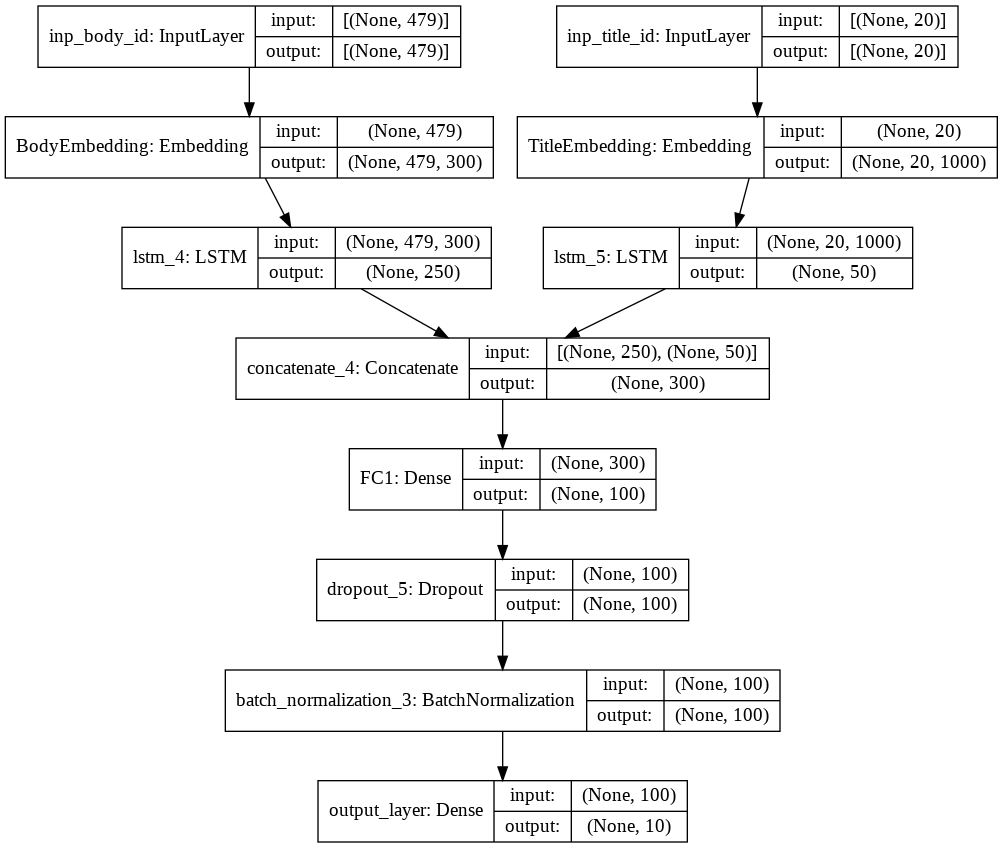

In [ ]:
plot_model(model_1, show_shapes=True)

In [ ]:
modelResults = model_1.fit( {'inp_body_id': token_ids_train_b , 'inp_title_id': token_ids_train_t}, 
                         y_train, 
                         #verbose=0, 
                         #callbacks=[tqdm_callback], 
                         batch_size=250, 
                         epochs=1, 
                         shuffle=True,
                         validation_split=0.2
                         )

539/539 [==============================] - 5683s 11s/step - loss: 1.6469 - accuracy: 0.5694 - binary_accuracy: 0.5851 - val_loss: 1.7756 - val_accuracy: 0.6074 - val_binary_accuracy: 0.6477


In [ ]:
  from sklearn.metrics import classification_report,f1_score

In [ ]:
predicted_main = model_1.predict({'inp_body_id': token_ids_test_b , 'inp_title_id': token_ids_test_t},verbose=1)

1315/1315 [==============================] - 571s 432ms/step


In [ ]:
f1_score(y_test , predicted_main>0.60 , average='samples')

0.4802906626239563